## Load Datasets

In [2]:
import pandas as pd
train_df = pd.read_csv('train.csv') 
test_df = pd.read_csv('test.csv') 

### Suppression des colonnes inutiles

In [3]:
train_df = train_df.drop(['keyword','location'],axis=1)
test_df = test_df.drop(['keyword','location'],axis=1)

In [4]:
train_df.head()

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
test_df.head()

,id,text
0,0,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s..."
2,3,"there is a forest fire at spot pond, geese are..."
3,9,Apocalypse lighting. #Spokane #wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan


In [6]:
train_df.groupby('target').size()

target
0    4342
1    3271
dtype: int64

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7613 non-null   int64 
 1   text    7613 non-null   object
 2   target  7613 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 178.6+ KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      3263 non-null   int64 
 1   text    3263 non-null   object
dtypes: int64(1), object(1)
memory usage: 51.1+ KB


In [9]:
import re
import unidecode
from spacy.lang.en.stop_words import STOP_WORDS as en_stop #Spacy stopwords
from nltk.stem import WordNetLemmatizer

### Text Processing

In [10]:
def remove_emoji():
  regrex_pattern = re.compile(pattern = "["    #Pattern pour enlever les emojis
          u"\U0001F600-\U0001F64F"  # emoticons
          u"\U0001F300-\U0001F5FF"  # symbols & pictographs
          u"\U0001F680-\U0001F6FF"  # transport & map symbols
          u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
          u"\U00002702-\U000027B0"
          u"\U00002702-\U000027B0"
          u"\U000024C2-\U0001F251"
          u"\U0001f926-\U0001f937"
          u"\U00010000-\U0010ffff"
          u"\u2640-\u2642" 
          u"\u2600-\u2B55"
          u"\u200d"
          u"\u23cf"
          u"\u23e9"
          u"\u231a"
          u"\ufe0f"  # dingbats
          u"\u3030"
                            "]+", flags = re.UNICODE)
  return regrex_pattern
 
def lematize(text):
  lemmatizer = WordNetLemmatizer()
  return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

def remove_stopwords(text):
  stopwords = " ".join([word for word in str(text).split() if word not in en_stop]) #Spacy stopwords
  return stopwords

def remove_words(text):
  liste_terme = ["ve","n","s","d","l","j","y","c","e","m","h","quelqu","cht","lr","oas","qu","ll","yu","an","g","don t"]
  return " ".join([word for word in str(text).split() if word not in liste_terme])

def remove_accents(text):
  return unidecode.unidecode(text)
    
def final_preprocess(text): 
    text = text.lower()  #Mettre tout les mots en minuscule 
    text = re.compile('<.*?>').sub('', text)
    text = text.replace('_',' ')
    text = re.sub(r'\[[0-9]*\]',' ',text)
    text = re.sub(r'{link}', '',text) #Remove links 
    text = re.sub(r"\[video\]", '',text) #Remove videos
    text = re.sub(r'&[a-z]+;', '',text) #Remove HTML references
    text = re.sub(r'@mention', '',text) #Remove Twitters handles @
    text = re.sub(r'\d+', '', text) #Remove numbers 
    text = re.sub(r'http\S+', '',text) #Remove HTML
    text = re.sub(r'www\S+', '',text) #Remove HTML
    text = re.sub(r'[^\w\s]+',' ',text) #Remove ponctuation et apostrophes
    text = re.sub(remove_emoji(),'',text)  #Remove les emojis
    text = lematize(text) #Lemmatization
    text = remove_accents(text) #Remove accents
    text = remove_stopwords(text) #Remove stopwords
    text = remove_words(text) #Remove custom words 
    return text 

In [11]:
print(en_stop)

{'whereafter', 'moreover', 'he', 'nowhere', 'our', 'several', 'anything', '‘m', 'am', 'most', 'hence', 'perhaps', 'though', '‘re', 'those', 're', 'not', 'someone', 'onto', 'out', 'go', 'part', 'did', 'only', 'three', 'ca', 'before', "'ll", 'wherein', 'himself', 'next', 'really', 'these', 'elsewhere', 'you', 'she', 'everything', 'herein', 'have', 'others', 'still', 'thus', 'up', 'various', 'therein', 'never', 'due', 'give', 'but', 'around', 'quite', 'his', 'n’t', 'noone', 'whereupon', 'as', 'down', 'another', 'us', 'with', 'then', 'beforehand', 'any', 'own', 'although', 'thru', 'your', 'via', 'behind', 'too', 'in', 'yourselves', 'anyone', 'this', 'whom', 'two', 'over', 'each', 'by', 'whereas', 'sixty', 'latterly', 'off', 'there', 'him', 'whatever', 'now', 'me', 'do', '’s', 'sometimes', 'beyond', 'the', 'whole', 'formerly', 'throughout', '’d', 'first', 'nor', 'through', 'become', 'twelve', 'using', 'some', 'while', '’re', 'since', 'we', 'also', 'along', 'somewhere', 'even', 'beside', 'bo

## Nettoyage des tweets

#### Final Pre Processing

In [12]:
train_df["text_clean"] = train_df["text"].apply(lambda x: final_preprocess(x))
test_df["text_clean"] = test_df["text"].apply(lambda x: final_preprocess(x))

In [13]:
pd.set_option('display.max_colwidth', None)
train_df.head()

,id,text,target,text_clean
0,1,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,deed reason earthquake allah forgive u
1,4,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,resident asked shelter place notified officer evacuation shelter place order expected
3,6,"13,000 people receive #wildfires evacuation orders in California",1,people receive wildfire evacuation order california
4,7,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,got sent photo ruby alaska smoke wildfire pours school


In [14]:
test_df.head()

,id,text,text_clean
0,0,Just happened a terrible car crash,happened terrible car crash
1,2,"Heard about #earthquake is different cities, stay safe everyone.",heard earthquake different city stay safe
2,3,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all",forest fire spot pond goose fleeing street save
3,9,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfire
4,11,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan


## Extraction de données vectoriels

### Spliting the training dataset into train and test

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_df["text_clean"],train_df["target"],test_size=0.2)

### Extraction des vecteurs de textes en données numériques 

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)

In [17]:
X_train_vectors_tfidf.shape

(6090, 12899)

In [18]:
X_test_vectors_tfidf.shape

(1523, 12899)

In [19]:
print(X_train_vectors_tfidf )

  (0, 5606)	0.3164515026061675
  (0, 11511)	0.23940561316494596
  (0, 4987)	0.4295596768205738
  (0, 9287)	0.31000948336081574
  (0, 1830)	0.34022917368747096
  (0, 8319)	0.33254379067497797
  (0, 11324)	0.3056714177787561
  (0, 1345)	0.395001920911859
  (0, 2604)	0.29345051822088003
  (1, 7546)	0.42700051782433956
  (1, 11733)	0.3230018132090295
  (1, 581)	0.2701339622180889
  (1, 11843)	0.31350369790594196
  (1, 1320)	0.24476590817828237
  (1, 3042)	0.30745310791128916
  (1, 1322)	0.27757384671562657
  (1, 10995)	0.24476590817828237
  (1, 8627)	0.30745310791128916
  (1, 8104)	0.2637062240109971
  (1, 12829)	0.2943122841356311
  (2, 12641)	0.35733956391626975
  (2, 1004)	0.3768606805954388
  (2, 3027)	0.35902133443982565
  (2, 11609)	0.36075331441747804
  (2, 6616)	0.2421226644152453
  :	:
  (6087, 1119)	0.5809753332401437
  (6087, 7424)	0.4512165030604754
  (6087, 10600)	0.44315605407323255
  (6087, 2624)	0.42368930459693965
  (6087, 4943)	0.2880475905831947
  (6088, 1627)	0.34670049

### Entrainement du modèle MultinomialNB

In [20]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_vectors_tfidf, y_train)  

MultinomialNB()

### Evaluation du modèle dans le train set

In [21]:
y_pred = model.predict(X_test_vectors_tfidf)
score = model.score(X_test_vectors_tfidf, y_test)
print(score)

0.804333552199606


In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       884
           1       0.81      0.70      0.75       639

    accuracy                           0.80      1523
   macro avg       0.81      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523



### Résultat final pour la prédiction des tweets

In [23]:
X_test= test_df['text_clean']

#Convertir les mots en donnée numérique 
X_vector = tfidf_vectorizer.transform(X_test)
y_pred = model.predict(X_vector)
test_df['target'] = y_pred
final_df = test_df[['text_clean','target']]

In [24]:
final_df.head()

,text_clean,target
0,happened terrible car crash,1
1,heard earthquake different city stay safe,1
2,forest fire spot pond goose fleeing street save,1
3,apocalypse lighting spokane wildfire,1
4,typhoon soudelor kill china taiwan,1


In [25]:
final_df.groupby('target').size()

target
0    2120
1    1143
dtype: int64

0    2120
1    1143
Name: target, dtype: int64


C:\Users\vince\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='target'>

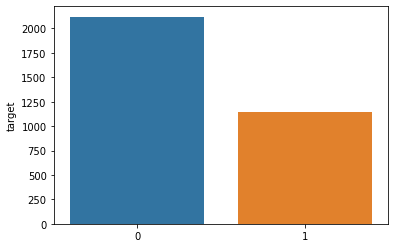

In [26]:
import seaborn as sns

x=final_df['target'].value_counts()
print(x)
sns.barplot(x.index,x)

0    4342
1    3271
Name: target, dtype: int64


C:\Users\vince\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='target'>

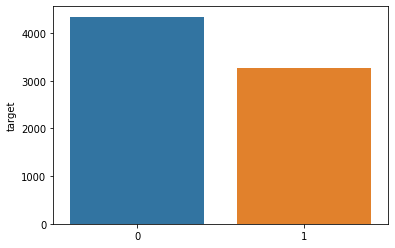

In [27]:
x=train_df['target'].value_counts()
print(x)
sns.barplot(x.index,x)

In [28]:
final_df['word_count'] = final_df['text_clean'].apply(lambda x: len(str(x).split()))
print(final_df[final_df['target']==1]['word_count'].mean()) #Disaster tweets
print(final_df[final_df['target']==0]['word_count'].mean()) #Non-Disaster tweets

9.252843394575677
8.550943396226415


C:\Users\vince\AppData\Local\Temp\ipykernel_5096\3691419990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['word_count'] = final_df['text_clean'].apply(lambda x: len(str(x).split()))


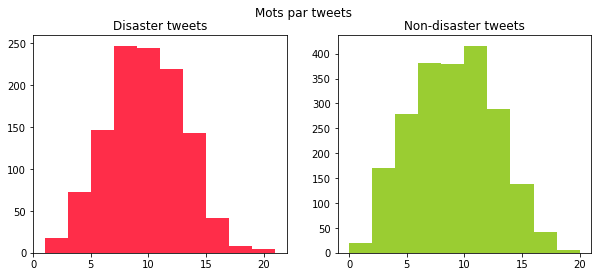

In [29]:
from matplotlib import pyplot as plt

# PLOTTING WORD-COUNT
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
train_words=final_df[final_df['target']==1]['word_count']
ax1.hist(train_words,color='#ff2d49')
ax1.set_title('Disaster tweets')
train_words=final_df[final_df['target']==0]['word_count']
ax2.hist(train_words,color='#9ACD32')
ax2.set_title('Non-disaster tweets')
fig.suptitle('Mots par tweets')
plt.show()

In [30]:
final_df.to_csv("final_df.csv")

In [31]:
sample_submission = final_df.drop(['text_clean','word_count'],axis=1)

In [32]:
sample_submission

,target
0,1
1,1
2,1
3,1
4,1
...,...
3258,1
3259,1
3260,1
3261,1


In [36]:
output = pd.DataFrame({'id': test_df['id'], 'target': sample_submission["target"]})

In [34]:
test_df

,id,text,text_clean,target
0,0,Just happened a terrible car crash,happened terrible car crash,1
1,2,"Heard about #earthquake is different cities, stay safe everyone.",heard earthquake different city stay safe,1
2,3,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all",forest fire spot pond goose fleeing street save,1
3,9,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfire,1
4,11,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan,1
...,...,...,...,...
3258,10861,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTENERS XrWn,earthquake safety los angeles uo safety fastener xrwn,1
3259,10865,Storm in RI worse than last hurricane. My city&amp;3others hardest hit. My yard looks like it was bombed. Around 20000K still without power,storm ri worse hurricane cityothers hardest hit yard look like wa bombed k power,1
3260,10868,Green Line derailment in Chicago http://t.co/UtbXLcBIuY,green line derailment chicago,1
3261,10874,MEG issues Hazardous Weather Outlook (HWO) http://t.co/3X6RBQJHn3,meg issue hazardous weather outlook hwo,1


In [37]:
output.to_csv("submission.csv",index=False)